In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.plotting import plot_decision_regions
import pickle
from sklearn.externals import joblib # saving modelsa
%matplotlib inline
# make prettier plots
%config InlineBackend.figure_format = 'svg' 

# Class balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline, make_pipeline

#Modeling
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, roc_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Yellowbrick visuals-- used for model selection + metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [3]:
# To load pickle back in
with open('df_cleaned.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [4]:
# Same split as other notebook
y = df['Response']
X = df.drop('Response', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state=4, stratify=y)

# KFold to standardize splits
kf = KFold(n_splits=5, random_state=4, shuffle=False)

# Check to make sure the same train/test splits and pickle are good

In [5]:
classifiers = [KNeighborsClassifier(5),
              GaussianNB(),
              SVC(kernel='rbf', C=.25, probability=True, gamma='auto'),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100),
              LogisticRegression(solver='lbfgs', max_iter=2000)]

In [7]:
def pipeline_with_ADASYN(classifiers):
    '''Pipeline that does crossval and balances. Only balances the train part of the CV, not the test.\
    Prints out metrics. This is used for model selection.'''
    for classifier in classifiers:
        pipeline_with_ADASYN = make_pipeline(ADASYN(random_state=4),classifier)
        
        # Print various scoring metrics
        print("Metrics for model: {}".format(classifier))
        print("crossval train accuracy score: {}".format(cross_val_score(pipeline_with_ADASYN,X_train,y_train,cv=kf, scoring = 'accuracy').mean()))
        print("crossval train recall score: {}".format(cross_val_score(pipeline_with_ADASYN,X_train,y_train,cv=kf, scoring='recall').mean()))
        print("crossval train precision score: {}".format(cross_val_score(pipeline_with_ADASYN,X_train,y_train,cv=kf, scoring='precision').mean()))
        print("crossval train f1 score: {}".format(cross_val_score(pipeline_with_ADASYN,X_train,y_train,cv=kf, scoring='f1').mean()))


In [7]:
#pipeline_with_ADASYN(classifiers)

# Testing crossval score OUTSIDE OF ADASYN PIPELINE-- so no balancing
- Want to make sure that the crossval and balancing inside the imblearn pipe are doing what they should be


In [8]:
logreg_test = LogisticRegression(penalty='l1')
logreg_test.fit(X_train, y_train)
print(cross_val_score(logreg_test, X_train,y_train, cv=kf, scoring='f1').mean())
print(cross_val_score(logreg_test, X_train,y_train, cv=kf, scoring='recall').mean())

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

0.5443850888470687
0.45555767152362725


/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [9]:
logreg_test.coef_

array([[ 8.71116552e-07,  4.03469783e-01, -9.36672492e-01,
        -3.00660022e-02, -6.90413284e-04,  1.17032068e-03,
         1.77999371e-03, -2.04568835e-03,  2.85732645e-04,
         2.43949917e-03,  1.31449148e-01,  1.07134389e-01,
        -3.68534188e-03, -1.44402102e-01,  4.59233563e-02,
         6.21720237e-01, -3.41463525e-01,  2.93079953e-01,
         0.00000000e+00,  0.00000000e+00,  1.26720621e-02,
         1.60088992e+00,  0.00000000e+00,  5.69182367e-01,
         1.25408854e+00,  1.37899370e+00,  0.00000000e+00,
         4.30482688e-03,  3.96057185e-04]])

# GridSearch on RandomForest + LogReg
- Did these separately/ took out of functions

### Setup RandomForest imblearn pipe w/ ADASYN

In [10]:
randforest_pipeline = make_pipeline(ADASYN(random_state=4),RandomForestClassifier())
randforest_pipeline

Pipeline(memory=None,
         steps=[('adasyn',
                 ADASYN(n_jobs=1, n_neighbors=5, random_state=4, ratio=None,
                        sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
   

### Apply grid search to ^^ pipeline

In [11]:
# Parameters to loop through for RandomForest model
params_randforest = {'n_estimators': [100, 250, 500, 1000, 1500],
                     'max_depth': [2, 3],
                     'max_features' : [2,3],
                     'min_samples_leaf': [3,4,5],
                     'min_samples_split': [8,10,12],
                     'random_state': [4]}

# Prep GridSearchCV
# Here in the GS we are plugging in 'randforest_pipeline' to ensure that the CrossVal and balancing from the
# imblearn pipeline are applied
new_params = {'randomforestclassifier__' + key: params_randforest[key] for key in params_randforest}
randforest_gridsearch = GridSearchCV(randforest_pipeline, param_grid=new_params, cv=kf, scoring='f1',\
                                   return_train_score=True)

# randforest_pipeline.fit(X_train, y_train)
# print("Random Forest mean test scores: {}".format(randforest_pipeline.cv_results_['mean_test_score']))
# print("Random Forest mean train scores: {}".format(randforest_pipeline.cv_results_['mean_train_score']))
# print("Random Forest best score: {}".format(randforest_pipeline.best_score_))
# print("Random Forest best params: {}".format(randforest_pipeline.best_params_))

In [12]:
randfor_grid_fit = randforest_gridsearch.fit(X_train, y_train)

In [13]:
randforest_gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('adasyn',
                 ADASYN(n_jobs=1, n_neighbors=5, random_state=4, ratio=None,
                        sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features=2, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=8,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=4,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [14]:
randforest_gridsearch.best_params_

{'randomforestclassifier__max_depth': 2,
 'randomforestclassifier__max_features': 2,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 8,
 'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__random_state': 4}

In [15]:
y_test_predict_rf = randforest_gridsearch.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [16]:
fbeta_score(y_test,y_test_predict_rf,beta=2.0)

0.5337078651685393

In [17]:
recall_score(y_test,y_test_predict_rf)

0.5671641791044776

In [18]:
def test_imblearn_vis(x):
    '''Run pipeline w/ adasyn again on input (x) model.\
    The input will be with the grid searched params.\
    Then create a discrim thresh plot.'''
    
    pipeline_with_ADASYN = make_pipeline(ADASYN(random_state=4),x)
    
    visualizer = DiscriminationThreshold(pipeline_with_ADASYN)
    visualizer.fit(X_train, y_train)
    visualizer.show()

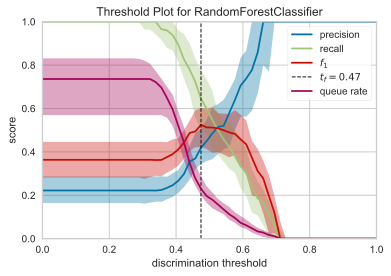

In [19]:
test_imblearn_vis(RandomForestClassifier(n_estimators=500, random_state=5, min_samples_leaf=3, min_samples_split=8, \
                              max_depth=2, max_features=2))

In [20]:
model = make_pipeline(ADASYN(random_state=4),RandomForestClassifier(n_estimators=500, random_state=5, min_samples_leaf=3, min_samples_split=8, \
                              max_depth=2, max_features=2))
    
visualizer = DiscriminationThreshold(model,fbeta=2.0)
visualizer.fit(X_train, y_train)
visualizer.show()

/anaconda3/envs/metis/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/anaconda3/envs/metis/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


## Save random forest grid search results using joblib

In [21]:
joblib.dump(randforest_gridsearch.best_estimator_, 'randomforest_grid.pkl')

['randomforest_grid.pkl']

## Feature importance plot-- need to tune model more but just testing

In [22]:
randforest_gridsearch.best_params_

{'randomforestclassifier__max_depth': 2,
 'randomforestclassifier__max_features': 2,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 8,
 'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__random_state': 4}

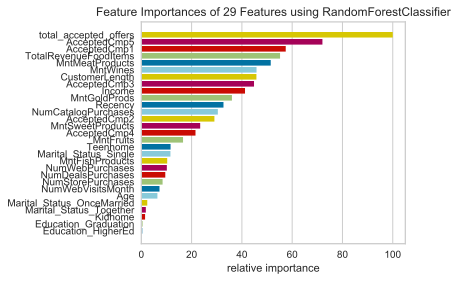

In [23]:
# Use yellowbrick plotting, but plug in best params from gridsearched randforest
model = RandomForestClassifier(n_estimators=500, random_state=5, min_samples_leaf=3, min_samples_split=8, \
                              max_depth=2, max_features=2)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

## ROCAUC for Randforest with gridsearch params
- Use 'model' from above

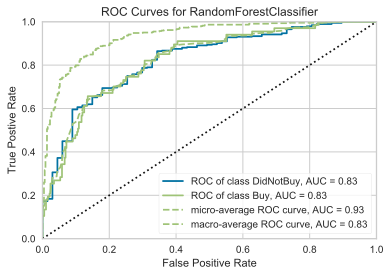

In [24]:
visualizer = ROCAUC(model, classes=["DidNotBuy", "Buy"])
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# GridSearch for LogReg

In [25]:
logreg_pipeline = make_pipeline(ADASYN(random_state=4),LogisticRegression())

In [26]:
# Test3 grid search logreg pipeline
params={'logisticregression__C':[.01,.05,.1,.5,1,5,10],
           'logisticregression__penalty':['l1','l2']}

logreg_grid = GridSearchCV(logreg_pipeline, cv=kf, n_jobs= -1, param_grid=params, scoring='f1')

In [27]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [28]:
logreg_grid_fit = logreg_grid.fit(X_train, y_train)

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
logreg_grid.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}

In [30]:
# Best f1 score from grid searching the logreg..
logreg_grid.best_score_

0.592525104698113

## Threshold plot for grid searched pipe

In [31]:
# def test_imblearn_vis(x):
#     '''Pipeline that does crossval and balances. Only balances the train part of the CV, not the test.\
#     Prints out metrics. This is used for model selection.'''
    
#     model = make_pipeline(ADASYN(random_state=4),x)
    
#     visualizer = DiscriminationThreshold(model, fbeta=2.0)
#     visualizer.fit(X_train, y_train)
#     visualizer.show()

# test_imblearn_vis(LogisticRegression(C=5, penalty='l1', solver='saga'))

In [32]:
def test_imblearn_vis2(x):
    '''Pipeline that does crossval and balances. Only balances the train part of the CV, not the test.\
    Prints out metrics. This is used for model selection.\
    THIS IS SHOWING FBETA NOT F1'''
    
    model = make_pipeline(ADASYN(random_state=4),x)
    
    visualizer = DiscriminationThreshold(model, fbeta=2.0)
    visualizer.fit(X_train, y_train)
    visualizer.show()

test_imblearn_vis2(LogisticRegression(C=5, penalty='l1'))

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

## ConfMatrix for grid searched pipe--- NO THRESH APPLIED

In [33]:
# # Confusion matrix with grid searched LR model
# def pipeline_with_ADASYN_ConfMatrix(model):

#     pipeline_with_ADASYN = make_pipeline(ADASYN(random_state=4),model)
    
#     confusion = confusion_matrix(y_test, pipeline_with_ADASYN.predict(X_test))
#     plt.figure(dpi=90)
#     ax = sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=[0,1], yticklabels=[0,1])
#     bottom,top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion matrix for: {}'.format(pipeline_with_ADASYN))

In [34]:
# pipeline_with_ADASYN_ConfMatrix(logreg_grid)

## Logreg grid predict proba
- predicting probability of class 0,1 with optimal grid search params from grid search

In [35]:
lr_pp = logreg_grid.predict_proba(X_test)
lr_pp

array([[2.75032822e-01, 7.24967178e-01],
       [8.68120870e-01, 1.31879130e-01],
       [5.08447995e-01, 4.91552005e-01],
       [9.99078205e-01, 9.21794705e-04],
       [8.92907551e-01, 1.07092449e-01],
       [4.79766071e-01, 5.20233929e-01],
       [7.69865338e-01, 2.30134662e-01],
       [1.74631783e-01, 8.25368217e-01],
       [9.67986636e-01, 3.20133642e-02],
       [5.37793040e-01, 4.62206960e-01],
       [1.19473705e-01, 8.80526295e-01],
       [5.74619347e-01, 4.25380653e-01],
       [4.13769911e-03, 9.95862301e-01],
       [1.24762365e-02, 9.87523764e-01],
       [8.05644195e-01, 1.94355805e-01],
       [9.31988075e-01, 6.80119246e-02],
       [8.45582665e-01, 1.54417335e-01],
       [9.32184712e-01, 6.78152882e-02],
       [8.38262801e-01, 1.61737199e-01],
       [9.98562440e-01, 1.43755986e-03],
       [9.10940032e-01, 8.90599680e-02],
       [9.60291061e-01, 3.97089385e-02],
       [8.87084263e-01, 1.12915737e-01],
       [9.60269512e-01, 3.97304876e-02],
       [9.824868

In [36]:
t = logreg_grid.predict_proba(X_test)[:,1] # used to get only column 1 (class 1, not 0)
t

array([7.24967178e-01, 1.31879130e-01, 4.91552005e-01, 9.21794705e-04,
       1.07092449e-01, 5.20233929e-01, 2.30134662e-01, 8.25368217e-01,
       3.20133642e-02, 4.62206960e-01, 8.80526295e-01, 4.25380653e-01,
       9.95862301e-01, 9.87523764e-01, 1.94355805e-01, 6.80119246e-02,
       1.54417335e-01, 6.78152882e-02, 1.61737199e-01, 1.43755986e-03,
       8.90599680e-02, 3.97089385e-02, 1.12915737e-01, 3.97304876e-02,
       1.75131096e-02, 5.49108937e-01, 9.97443739e-02, 1.38941144e-02,
       4.98203183e-02, 7.52454128e-02, 7.19659863e-01, 1.41059763e-02,
       9.13725226e-02, 4.78823733e-01, 2.78135024e-02, 7.64490420e-02,
       1.93893136e-01, 9.82869720e-03, 5.53047519e-02, 7.49315044e-02,
       3.20915866e-02, 7.30895638e-01, 9.70803586e-02, 8.43951343e-01,
       3.82317022e-02, 1.01940552e-03, 2.75107664e-02, 1.10077550e-01,
       4.30335088e-02, 3.96853852e-02, 1.68424771e-01, 1.23563336e-01,
       2.38690758e-03, 4.70288739e-03, 1.44381429e-01, 9.81642576e-01,
      

In [37]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, logreg_grid.predict_proba(X_train)[:,1])
df_logreg_pipe = pd.DataFrame(list(zip(precision_curve, recall_curve, threshold_curve)),\
                     columns=['precision','recall', 'threshhold'])

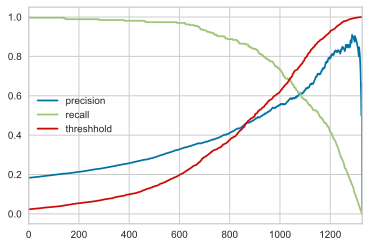

In [38]:
df_logreg_pipe.plot()

In [39]:
df_logreg_pipe

,precision,recall,threshhold
0,0.183956,1.000000,0.022539
1,0.183391,0.996241,0.022679
2,0.183518,0.996241,0.023160
3,0.183645,0.996241,0.023500
4,0.183773,0.996241,0.023859
...,...,...,...
1323,0.600000,0.011278,0.999814
1324,0.500000,0.007519,0.999840
1325,0.666667,0.007519,0.999876
1326,0.500000,0.003759,0.999920


# Random Forest pr curve

In [40]:
precision_curve_rf, recall_curve_rf, threshold_curve_rf = precision_recall_curve(y_train, randforest_gridsearch.predict_proba(X_train)[:,1])

df_randforest_pipe = pd.DataFrame(list(zip(precision_curve, recall_curve, threshold_curve)),\
                     columns=['precision','recall', 'threshhold'])

In [41]:
df_randforest_pipe

,precision,recall,threshhold
0,0.183956,1.000000,0.022539
1,0.183391,0.996241,0.022679
2,0.183518,0.996241,0.023160
3,0.183645,0.996241,0.023500
4,0.183773,0.996241,0.023859
...,...,...,...
1323,0.600000,0.011278,0.999814
1324,0.500000,0.007519,0.999840
1325,0.666667,0.007519,0.999876
1326,0.500000,0.003759,0.999920


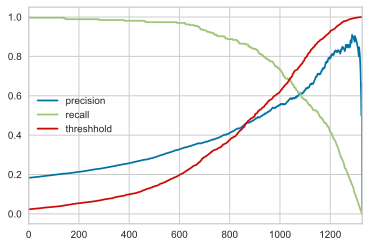

In [42]:
df_randforest_pipe.plot()

# RandomForest threshold find with beta = 2

In [43]:
# def discrim_tresh_rf(x):
#     '''Pipeline that does crossval and balances. Only balances the train part of the CV, not the test.\
#     Prints out metrics. This is used for model selection.\
#     THIS IS SHOWING FBETA NOT F1'''
    
#     # instantiate model, with input model specs (x)
#     model = make_pipeline(ADASYN(random_state=4),x)
    
#     # Specify fbeta = 2, same used for LR
#     visualizer = DiscriminationThreshold(model, fbeta=2.0)
#     visualizer.fit(X_train, y_train)
#     visualizer.show()

In [44]:
# discrim_tresh_rf(RandomForestClassifier(n_estimators=500, random_state=5, min_samples_leaf=3,\
#                                          min_samples_split=8, max_depth=2, max_features=20))

# RandomForest conf matrix w/ threshold

In [45]:
## This gives the same results as the yellowbrick one above... so take this and then customize it with thresh

def make_conf_matrix_rf(model, threshold= .6):
    '''Predict class 1 if prob of being in class 1 is greater than threshold.
    Threshold taken from f1beta weighted towards recall (2.0)'''
    y_pred_rf = randforest_gridsearch.predict_proba(X_test)[:,1] > threshold
    logreg_confusion = confusion_matrix(y_test, y_pred_rf)
    plt.figure(dpi=90)
    ax = sns.heatmap(logreg_confusion, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=[0,1],
               yticklabels=[0,1])
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.xlabel('Predicted Response to Camp.')
    plt.ylabel('Actual Response to Camp.')
    plt.title('RF confusion matrix');

In [46]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_conf_matrix_rf(logreg_grid, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

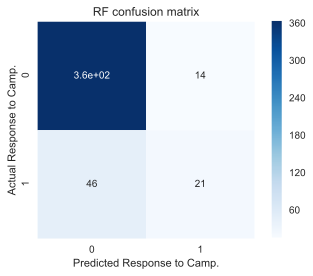

In [47]:
make_conf_matrix_rf(randforest_gridsearch)

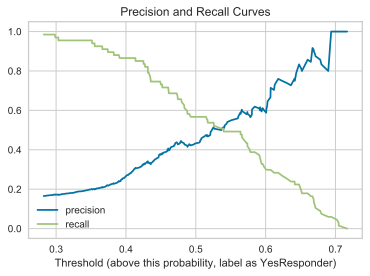

In [48]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, randforest_gridsearch.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as YesResponder)');
plt.title('Precision and Recall Curves');

# Logreg

# Predict proba with threshold + ConfMatrix


In [49]:
## This gives the same results as the yellowbrick one above... so take this and then customize it with thresh

def make_conf_matrix_lr(model, threshold = 0.44):
    '''Predict class 1 if prob of being in class 1 is greater than threshold.
    Threshold taken from f1beta weighted towards recall (2.0)'''
    
    y_pred_lr = logreg_grid.predict_proba(X_test)[:,1] > threshold
    logreg_confusion = confusion_matrix(y_test, y_pred_lr)
    plt.figure(dpi=90)
    ax = sns.heatmap(logreg_confusion, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=[0,1],
               yticklabels=[0,1])
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.xlabel('Predicted Response to Camp.')
    plt.ylabel('Actual Response to Camp.')
    plt.title('LR confusion matrix');

In [50]:
# #JUST TESTING OUTSIDE THE FX 

# y_pred_lr = logreg_grid.predict_proba(X_test)[:,1] > .44
# logreg_confusion = confusion_matrix(y_test, y_pred_lr)
# plt.figure(dpi=90)
# ax = sns.heatmap(logreg_confusion, cmap=plt.cm.Blues, annot=True, square=True,\
#                  xticklabels=[0,1], yticklabels=[0,1])
# bottom,top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# plt.xlabel('Predicted Response to Camp.')
# plt.ylabel('Actual Response to Camp.')
# plt.title('LR confusion matrix');

In [51]:
y_test.value_counts()

0    376
1     67
Name: Response, dtype: int64

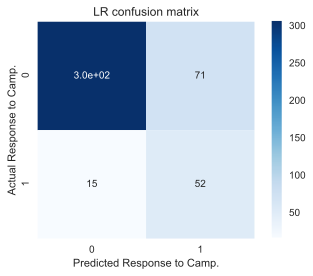

In [52]:
make_conf_matrix_lr(logreg_grid)

In [53]:
y_pred_lr = logreg_grid.predict_proba(X_test)[:,1] > .44

In [54]:
f1_score(y_test, y_pred_lr)

0.5473684210526316

In [55]:
recall_score(y_test, y_pred_lr)

0.7761194029850746

In [56]:
precision_score(y_test, y_pred_lr)

0.42276422764227645

In [57]:
roc_auc_score(y_test, y_pred_lr)

0.7936448078755161

In [58]:
print("ROC AUC score = ", roc_auc_score(y_test, logreg_grid_fit.predict_proba(X_test)[:,1]))

ROC AUC score =  0.8774214036201968


In [59]:
# # Let's see how our confusion matrix changes with changes to the cutoff! 

# from ipywidgets import interactive, FloatSlider

# interactive(lambda threshold: make_conf_matrix_lr(logreg_grid, threshold), threshold=(0.0,1.0,0.02))


# SOMETHING WEIRD HERE WHERE IT'S APPLYING THE BASE THRESH FROM FX SO .50 START IS ACTUALLY .44

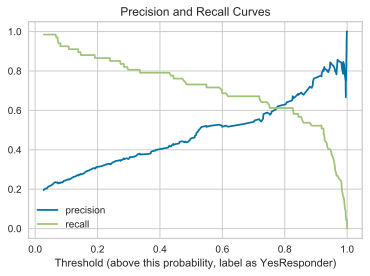

In [60]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logreg_grid.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as YesResponder)');
plt.title('Precision and Recall Curves');

In [61]:
#y_predict = (logreg_grid.predict(X_test)[:,1] > 0.45)
#f1_score(y_test, y_predit)

# Logreg roc curve

In [62]:
logreg_grid_fit.best_estimator_.predict_proba(X_test)[:,1]

array([7.24967178e-01, 1.31879130e-01, 4.91552005e-01, 9.21794705e-04,
       1.07092449e-01, 5.20233929e-01, 2.30134662e-01, 8.25368217e-01,
       3.20133642e-02, 4.62206960e-01, 8.80526295e-01, 4.25380653e-01,
       9.95862301e-01, 9.87523764e-01, 1.94355805e-01, 6.80119246e-02,
       1.54417335e-01, 6.78152882e-02, 1.61737199e-01, 1.43755986e-03,
       8.90599680e-02, 3.97089385e-02, 1.12915737e-01, 3.97304876e-02,
       1.75131096e-02, 5.49108937e-01, 9.97443739e-02, 1.38941144e-02,
       4.98203183e-02, 7.52454128e-02, 7.19659863e-01, 1.41059763e-02,
       9.13725226e-02, 4.78823733e-01, 2.78135024e-02, 7.64490420e-02,
       1.93893136e-01, 9.82869720e-03, 5.53047519e-02, 7.49315044e-02,
       3.20915866e-02, 7.30895638e-01, 9.70803586e-02, 8.43951343e-01,
       3.82317022e-02, 1.01940552e-03, 2.75107664e-02, 1.10077550e-01,
       4.30335088e-02, 3.96853852e-02, 1.68424771e-01, 1.23563336e-01,
       2.38690758e-03, 4.70288739e-03, 1.44381429e-01, 9.81642576e-01,
      

ROC AUC score =  0.8774214036201968


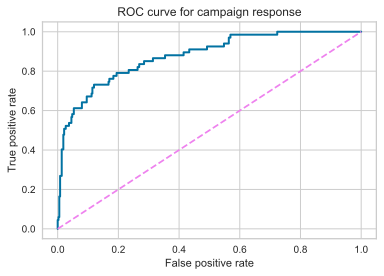

In [63]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
fpr, tpr, thresholds = roc_curve(y_test, logreg_grid_fit.best_estimator_.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for campaign response');
print("ROC AUC score = ", roc_auc_score(y_test, logreg_grid_fit.best_estimator_.predict_proba(X_test)[:,1]))

ROC AUC score =  0.8774214036201968


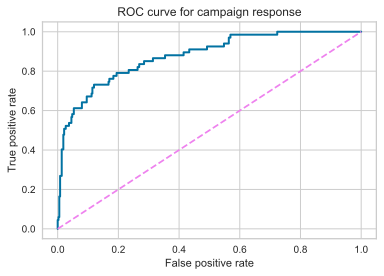

In [64]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
fpr, tpr, thresholds = roc_curve(y_test, logreg_grid_fit.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for campaign response');
print("ROC AUC score = ", roc_auc_score(y_test, logreg_grid_fit.predict_proba(X_test)[:,1]))

# Randforest roc curve

ROC AUC score =  0.8255001587805653


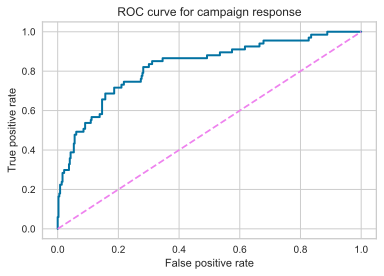

In [65]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
fpr, tpr, thresholds = roc_curve(y_test, randfor_grid_fit.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for campaign response');
print("ROC AUC score = ", roc_auc_score(y_test, randfor_grid_fit.predict_proba(X_test)[:,1]))

In [66]:
logreg_grid.best_estimator_.named_steps

{'adasyn': ADASYN(n_jobs=1, n_neighbors=5, random_state=4, ratio=None,
        sampling_strategy='auto'),
 'logisticregression': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False)}

# Yellowbrick feature importance with GridSearchCV params from logreg_grid.best_estimator_

In [49]:
# model = LogisticRegression(C=1, l1_ratio=None, max_iter=100, fit_intercept=True)
# vis_feat_imp = FeatureImportances(model, relative=False) #Relative = false so they're betas?
# vis_feat_imp.fit(X_test, y_test)
# vis_feat_imp.show()

In [48]:
# # Need to standardize this before performing such intense regularization-- DNU this

# #model = logreg_pipeline()
# model = LogisticRegression(C=10, penalty='l1', l1_ratio=None, max_iter=100, fit_intercept=True)
# vis_feat_imp = FeatureImportances(model, relative=False) #Relative = false so they're betas?
# vis_feat_imp.fit(X_train, y_train)
# vis_feat_imp.show()

In [69]:
list(zip(vis_feat_imp.features_, vis_feat_imp.feature_importances_))

[('Teenhome', -1.4153940748034441),
 ('AcceptedCmp5', -0.5200980211645766),
 ('Kidhome', -0.3899081756740946),
 ('NumStorePurchases', -0.355635766607985),
 ('Marital_Status_Together', -0.1984057243327422),
 ('AcceptedCmp2', -0.07310732132095019),
 ('Recency', -0.0418981284282452),
 ('MntGoldProds', -0.005383258251476347),
 ('MntSweetProducts', -0.004976861415422562),
 ('MntFishProducts', -0.0041221521152696484),
 ('Age', -0.0038131364972537455),
 ('Income', 1.1771699834268715e-05),
 ('MntWines', 0.00016009678908550305),
 ('TotalRevenueFoodItems', 0.0002627664750369376),
 ('MntMeatProducts', 0.0007839823971875043),
 ('CustomerLength', 0.0038889402088126933),
 ('MntFruits', 0.0070814523844165735),
 ('AcceptedCmp3', 0.00862167768197443),
 ('NumDealsPurchases', 0.01553069058746235),
 ('NumWebPurchases', 0.018202073354738706),
 ('NumWebVisitsMonth', 0.28957305783507814),
 ('NumCatalogPurchases', 0.42689011290581574),
 ('AcceptedCmp4', 0.5527840875130515),
 ('AcceptedCmp1', 0.603733902967377

# RandomForest feature importance with regular model, no grid inputs

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


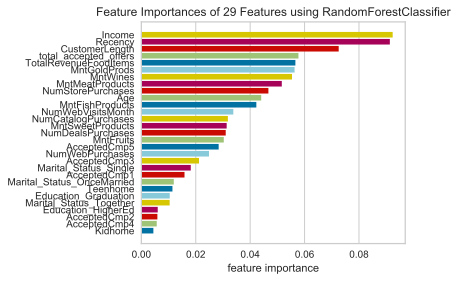

In [70]:
m = RandomForestClassifier()
z = FeatureImportances(m, relative=False)
z.fit(X_train, y_train)
z.show()

# RandomForest feature importance but with gridsearch params

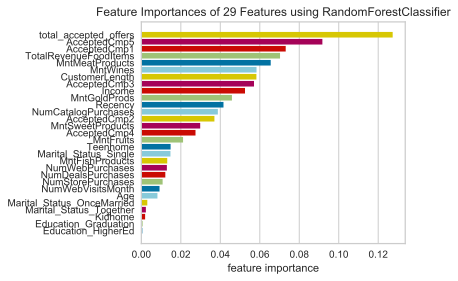

In [71]:
# Use yellowbrick plotting, but plug in best params from gridsearched randforest
model = RandomForestClassifier(n_estimators=500, random_state=5, min_samples_leaf=3, min_samples_split=8, \
                              max_depth=2, max_features=2)
viz = FeatureImportances(model, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [72]:
randforest_gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('adasyn',
                 ADASYN(n_jobs=1, n_neighbors=5, random_state=4, ratio=None,
                        sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features=2, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=8,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=4,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [73]:
logreg_grid.best_estimator_.named_steps

{'adasyn': ADASYN(n_jobs=1, n_neighbors=5, random_state=4, ratio=None,
        sampling_strategy='auto'),
 'logisticregression': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False)}

# Feature reduction / testing logreg

In [74]:
df.corr()['NumStorePurchases']

Income                        0.630397
Kidhome                      -0.512837
Teenhome                      0.048475
Recency                      -0.000784
MntWines                      0.639889
MntFruits                     0.458457
MntMeatProducts               0.485877
MntFishProducts               0.457641
MntSweetProducts              0.455096
MntGoldProds                  0.389039
NumDealsPurchases             0.066468
NumWebPurchases               0.516191
NumCatalogPurchases           0.517743
NumStorePurchases             1.000000
NumWebVisitsMonth            -0.432369
AcceptedCmp3                 -0.069035
AcceptedCmp4                  0.177943
AcceptedCmp5                  0.212884
AcceptedCmp1                  0.178674
AcceptedCmp2                  0.085240
Response                      0.036085
Age                           0.127660
total_accepted_offers         0.202615
Education_Graduation          0.012914
Education_HigherEd            0.031396
Marital_Status_OnceMarrie

In [75]:
df_reduced = df.copy()

In [76]:
df_reduced.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'total_accepted_offers',
       'Education_Graduation', 'Education_HigherEd',
       'Marital_Status_OnceMarried', 'Marital_Status_Single',
       'Marital_Status_Together', 'CustomerLength', 'TotalRevenueFoodItems'],
      dtype='object')

# XGBoost

In [31]:
# Check weights for classes
# Weights go into XGBoost to balance
y_train.value_counts()

0    1506
1     266
Name: Response, dtype: int64

In [32]:
# Balancing for xgboost ratio
# scale_pos_weight = count(negative examples)/count(Positive examples)
1506/266

5.661654135338346

# XGBoost model
- Balanced and hyper tuned

Accuracy is: 0.7855530474040632
Recall is: 0.6716417910447762
AUC is: 0.7387464274372817


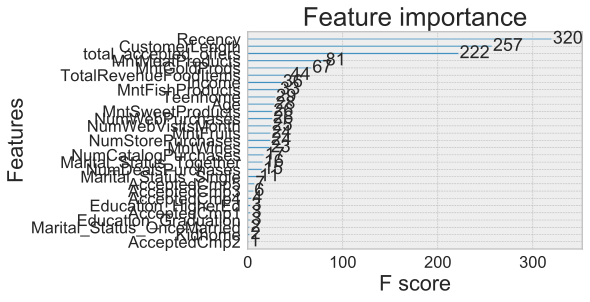

In [53]:
xg_reg = xgb.XGBClassifier(scale_pos_weight=5.6, learning_rate=0.001, n_estimators=200, subsample=.3)
xg_fit = xg_reg.fit(X_train,y_train)

y_pred = xg_fit.predict(X_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test,predictions)
recall = recall_score(y_test,predictions)
roc = roc_auc_score(y_test, predictions)
print("Accuracy is: {}".format(accuracy))
print("Recall is: {}".format(recall))
print("AUC is: {}".format(roc))

xgb.plot_importance(xg_reg, importance_type='weight')

In [34]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'total_accepted_offers',
       'Education_Graduation', 'Education_HigherEd',
       'Marital_Status_OnceMarried', 'Marital_Status_Single',
       'Marital_Status_Together', 'CustomerLength', 'TotalRevenueFoodItems'],
      dtype='object')

## Rename top feature columns for xgboost so the graph looks nicer


In [35]:
df_renamed = df.rename(columns={"CustomerLength": "Customer Length", "total_accepted_offers": "Total Accepted Offers"\
                               , "MntMeatProducts": "Meat Product Revenue", "TotalRevenueFoodItems": "Food Items Total Revenue",\
                               "MntFishProducts": "Fish Product Revenue", "Teenhome": "Teenage Child",\
                               "NumWebPurchases": "# Web Purchases"})


In [36]:
df_renamed.columns

Index(['Income', 'Kidhome', 'Teenage Child', 'Recency', 'MntWines',
       'MntFruits', 'Meat Product Revenue', 'Fish Product Revenue',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       '# Web Purchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age',
       'Total Accepted Offers', 'Education_Graduation', 'Education_HigherEd',
       'Marital_Status_OnceMarried', 'Marital_Status_Single',
       'Marital_Status_Together', 'Customer Length',
       'Food Items Total Revenue'],
      dtype='object')

In [37]:
df_renamed.drop('MntGoldProds', axis=1, inplace=True)

In [38]:
# Same split as other notebook
y_xg = df_renamed['Response']
X_xg = df_renamed.drop('Response', axis=1)
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_xg,y_xg,test_size = .2, random_state=4, stratify=y)

# KFold to standardize splits
kf = KFold(n_splits=5, random_state=4, shuffle=False)

Accuracy is: 0.781038374717833
Recall is: 0.6716417910447762
AUC is: 0.7360868529691964


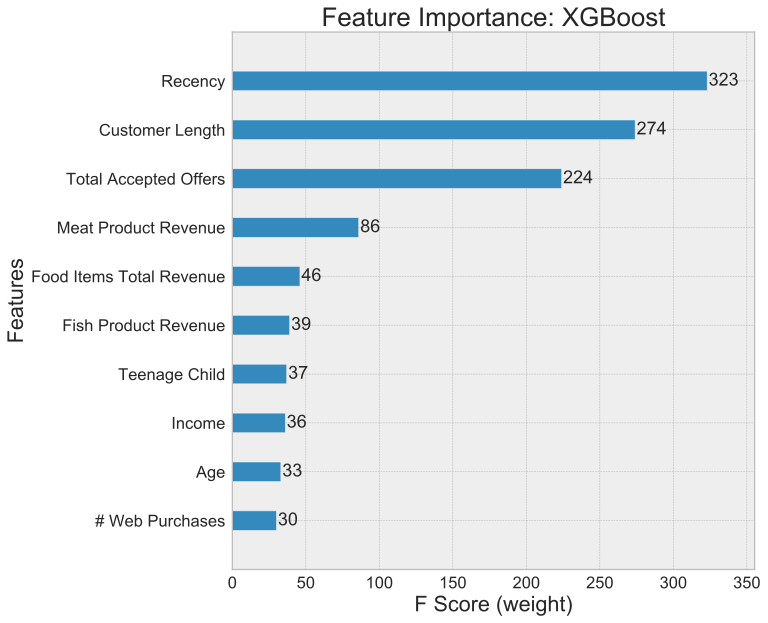

In [41]:
xg_reg2 = xgb.XGBClassifier(scale_pos_weight=5.6, learning_rate=0.001, n_estimators=200, subsample=.3)
xg_fit2 = xg_reg2.fit(X_train_xg,y_train_xg)

y_pred2 = xg_fit2.predict(X_test_xg)
predictions2 = [round(value) for value in y_pred2]


accuracy = accuracy_score(y_test_xg,predictions2)
recall = recall_score(y_test_xg,predictions2)
roc = roc_auc_score(y_test_xg, predictions2)
print("Accuracy is: {}".format(accuracy))
print("Recall is: {}".format(recall))
print("AUC is: {}".format(roc))

# Feature importance:
ax = xgb.plot_importance(xg_reg2,max_num_features=10, importance_type='weight',height=.4,\
                         xlabel="F Score (weight)", title="Feature Importance: XGBoost")
fig = ax.figure
fig.set_size_inches(11,9) #width,height
plt.style.use('bmh')
plt.tight_layout()
#plt.savefig('XGBoost_feat_imp')



# "weight" is the number of times a feature appears in a tree
# F score = ## ^, so number of times the variable was split on.

Accuracy is: 0.8645598194130926
Recall is: 0.7014925373134329


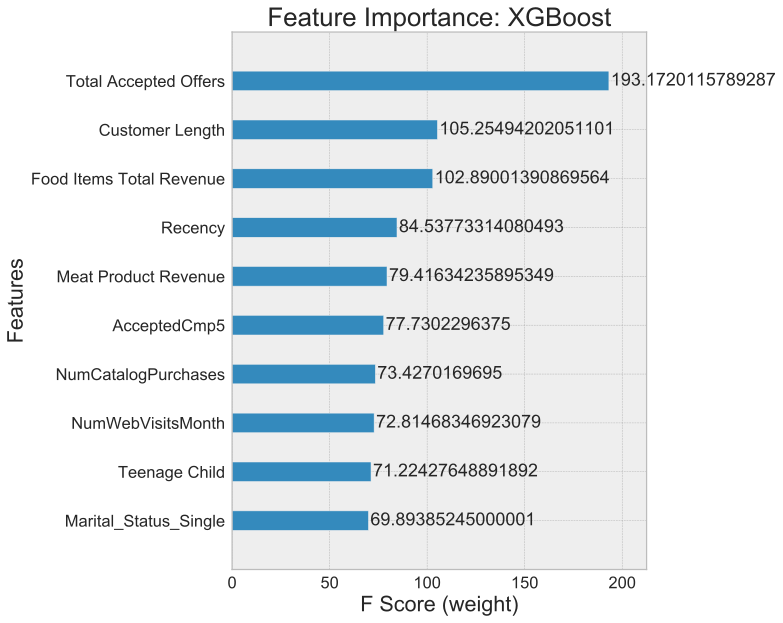

In [46]:
# # xg_reg2 = xgb.XGBClassifier(scale_pos_weight=5.6, learning_rate=0.001, n_estimators=200, subsample=.3)
# # xg_fit2 = xg_reg2.fit(X_train_xg,y_train_xg)

# # y_pred2 = xg_fit2.predict(X_test_xg)
# xg_grid.best_estimator_.predict(X_test)
# predictions2 = [round(value) for value in xg_grid.best_estimator_.predict(X_test)]


# accuracy = accuracy_score(y_test_xg,predictions2)
# recall = recall_score(y_test_xg,predictions2)
# roc = roc_auc_score(y_test_xg, predictions2)
# print("Accuracy is: {}".format(accuracy))
# print("Recall is: {}".format(recall))

# # Feature importance:
# ax = xgb.plot_importance(xg_reg2,max_num_features=10, importance_type='cover',height=.4,\
#                          xlabel="F Score (weight)", title="Feature Importance: XGBoost")
# fig = ax.figure
# fig.set_size_inches(11,9) #width,height
# plt.style.use('bmh')
# plt.tight_layout()
# #plt.savefig('XGBoost_feat_imp')



# # "weight" is the number of times a feature appears in a tree
# # F score = ## ^, so number of times the variable was split on.

In [43]:
print( plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [207]:
# # THIS ONE IS WRONG BECAUSE USING XG_REG NOT XG GRID WITH BEST PARAMS

# fpr, tpr, thresholds = roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr,lw=2)
# plt.plot([0,1],[0,1],c='violet',ls='--')
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])


# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC Curve:XGBoost');
# print("ROC AUC score = ", roc_auc_score(y_test, xg_reg.predict_proba(X_test)[:,1]))

In [210]:
# # LOGREG AUC

# fpr, tpr, thresholds = roc_curve(y_test, logreg_grid_fit.best_estimator_.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr,lw=2)
# plt.plot([0,1],[0,1],c='violet',ls='--')
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])


# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve for campaign response');
# print("ROC AUC score = ", roc_auc_score(y_test, logreg_grid_fit.best_estimator_.predict_proba(X_test)[:,1]))

# Gridsearch for XGB model

In [15]:
xg_reg_params = {'learning_rate': [0.001, 0.1, 0.5, 0.9],
                'n_estimators': [200],
                'subsample': [0.3, 0.5, 0.9]}

In [16]:
# xg_grid = GridSearchCV(estimator=xg_reg, param_grid=xg_reg_params, scoring='neg_mean_squared_error', cv=3, verbose=1)

In [17]:
xg_grid = GridSearchCV(estimator=xg_reg, param_grid=xg_reg_params, scoring='roc_auc', cv=3, verbose=1)

In [18]:
xg_grid_fit = xg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   12.5s finished


In [19]:
xg_grid_fit.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}

In [20]:
print("ROC AUC score = ", roc_auc_score(y_test, xg_grid_fit.best_estimator_.predict_proba(X_test)[:,1]))

ROC AUC score =  0.9035805017465862


In [21]:
#xg_grid.fit(X_test, y_test) # here i was accidentally fitting on test data, not train...

In [22]:
print("Lowest RMSE found:", np.abs(xg_grid.best_score_))

Lowest RMSE found: 0.8948255152710624


In [23]:
#xg_grid.predict_proba(X_test)[:,-1]

In [24]:
# precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, xg_grid.predict_proba(X_test)[:,-1])
# df_xg_grid = pd.DataFrame(list(zip(precision_curve, recall_curve, threshold_curve)),\
#                      columns=['precision','recall', 'threshhold'])

In [25]:
# df_xg_grid.plot()

In [26]:
xg_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.6, seed=None,
              silent=None, subsample=0.9, verbosity=1)

ROC AUC score =  0.9035805017465862


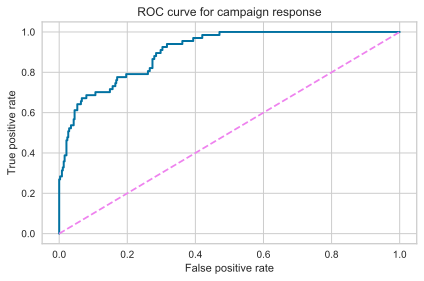

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, xg_grid.best_estimator_.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for campaign response')

#fig.set_size_inches(11,9) #width,height
plt.style.use('bmh')
plt.tight_layout()
plt.savefig('ROC_XGBoost')

print("ROC AUC score = ", roc_auc_score(y_test, xg_grid.best_estimator_.predict_proba(X_test)[:,1]))

In [28]:
print("ROC AUC score = ", roc_auc_score(y_test, xg_grid.best_estimator_.predict_proba(X_test)[:,1]))

ROC AUC score =  0.9035805017465862


# Confusion Matrix XGboost

In [29]:
#xg_grid.best_estimator_.predict(X_test)

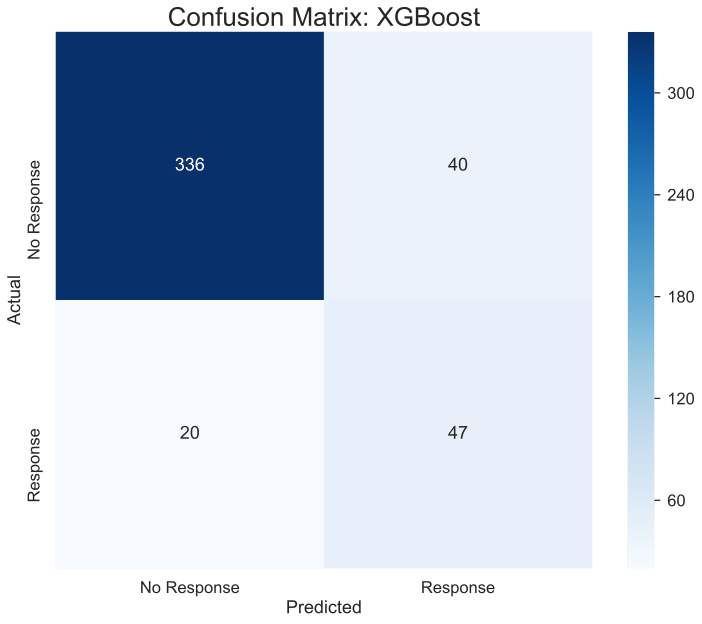

In [30]:
# Conf matrix using xg_grid.best_estimator_.predict NOT THE STANDARD MODEL
# USE THE BEST ESTIMATOR IN THERE AND THE AUC TO ENSURE ALL THE BEST PARAMS FROM GRID ARE APPLIED

y_pred_xg_grid = xg_grid.best_estimator_.predict(X_test)
xg_grid_confusion = confusion_matrix(y_test, y_pred_xg_grid)
plt.figure(dpi=90)
sns.set(style='darkgrid',palette='deep', font_scale=1.5)
ax = sns.heatmap(xg_grid_confusion, cmap=plt.cm.Blues, annot=True,fmt='g', square=True,\
                 xticklabels=['No Response','Response'], yticklabels=['No Response','Response'])
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

fig = ax.figure
fig.set_size_inches(11,9) #width,height
plt.style.use('bmh')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: XGBoost')
plt.tight_layout()
plt.savefig('XGBoost_conf_matrix')



In [44]:
xg_grid.best_estimator_.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [205]:
# This version used xg_fit.predict, NOT THE BEST PARAMS VERSION

# y_pred_xg = xg_fit.predict(X_test)
# xg_confusion = confusion_matrix(y_test, y_pred_xg)
# plt.figure(dpi=90)
# ax = sns.heatmap(xg_confusion, cmap=plt.cm.Blues, annot=True, square=True,\
#                  xticklabels=[0,1], yticklabels=[0,1])
# bottom,top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# plt.xlabel('Predicted Response to Camp.')
# plt.ylabel('Actual Response to Camp.')
# plt.title('XG confusion matrix');